In [ ]:
#구글 코랩에서 랩확인하기, 구글프로라서 램 27기가^^

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
#구글드라이브의 데이터 마운트

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


ValueError: ignored

In [ ]:
# 판다스, 넘파이 라이브러리 불러오기

import pandas as pd
import numpy as np

In [ ]:
# 구글드라이브의 저장되어 있는 파일 확인하기(transportaion_research.csv 활용)

!ls "/gdrive/My Drive/Data/"

'1. 제주빅데이터경진대회_데이콘'   sample-TRR_CR.csv
 2020_LEND_01.xlsx		   sample-TRR.xlsx
 8._2017_train.csv		   tmdb_5000_credits.csv
 ISBN.csv			   tmdb_5000_movies.csv
'New Masks Dataset'		   transportaion_research.csv


In [ ]:
# 데이터 불러와서 맨앞 2개만 보기

df= pd.read_csv('/gdrive/My Drive/Data/transportaion_research.csv')
df.head(2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,Book DOI,Early Access Date,Number of Pages,WoS Categories,Research Areas,IDS Number,UT (Unique WOS ID),Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,Unnamed: 67
0,0,J,"Mousa, MR; Elseifi, MA; Bashar, MZ; Zhang, ZJ;...",NaN,NaN,NaN,"Mousa, Momen R.; Elseifi, Mostafa A.; Bashar, ...",NaN,NaN,Short and Long-Term Field Performances and Opt...,TRANSPORTATION RESEARCH RECORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chip seal is a preventive maintenance techniqu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0361-1981,2169-4052,NaN,NaN,NaN,JAN,2020.0,2674.0,1.0,NaN,NaN,NaN,NaN,33.0,43.0,UNSP 0361198119898395,10.1177/0361198119898395,NaN,JAN 2020,NaN,NaN,NaN,NaN,WOS:000507923000001,NaN,NaN,NaN,NaN,NaN,NaN
1,1,J,"Cats, O; West, J",NaN,NaN,NaN,"Cats, Oded; West, Jens",NaN,NaN,Learning and Adaptation in Dynamic Transit Ass...,TRANSPORTATION RESEARCH RECORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The distribution of passenger demand over the ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0361-1981,2169-4052,NaN,NaN,NaN,JAN,2020.0,2674.0,1.0,NaN,NaN,NaN,NaN,113.0,124.0,NaN,10.1177/0361198119900138,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000524526000011,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Article Title(제목)과 Abstract(초록), Publication Year(출판연도) 열만 사용하여 분석을 진행할 예정
# 데이터프레임 형태로 맨앞 5개만 보기

df = df[['Article Title','Abstract','Publication Year']]
df.head()

,Article Title,Abstract,Publication Year
0,Short and Long-Term Field Performances and Opt...,Chip seal is a preventive maintenance techniqu...,2020.0
1,Learning and Adaptation in Dynamic Transit Ass...,The distribution of passenger demand over the ...,2020.0
2,Benefit-Cost Analyses of Rectangular Flashing ...,"In recent years, rectangular flashing beacons ...",2020.0
3,Corrosion Management of Maritime Infrastructure,Maritime infrastructure is at high risk for co...,2019.0
4,From Traditional to Automated Mobility on Dema...,Mobility on demand (MoD) systems have recently...,2019.0


In [ ]:
# 데이터의 구조 살펴보기(행 15,730개, 열 3개)

df.shape

(15730, 3)

In [ ]:
# 논문의 제목이 같은게 있으면, 중복을 제거하여 덮어쓰기
df=df.drop_duplicates('Article Title')
df.head()

,Article Title,Abstract,Publication Year
0,Short and Long-Term Field Performances and Opt...,Chip seal is a preventive maintenance techniqu...,2020.0
1,Learning and Adaptation in Dynamic Transit Ass...,The distribution of passenger demand over the ...,2020.0
2,Benefit-Cost Analyses of Rectangular Flashing ...,"In recent years, rectangular flashing beacons ...",2020.0
3,Corrosion Management of Maritime Infrastructure,Maritime infrastructure is at high risk for co...,2019.0
4,From Traditional to Automated Mobility on Dema...,Mobility on demand (MoD) systems have recently...,2019.0


In [ ]:
# 중복되는 논문이 일부(221건) 있었던 것으로 파악됨

df.shape

(15509, 3)

In [ ]:
# 데이터의 누락값을 확인해본 결과, 초록(Abstract)과 출판년(Publication Year)이 존재함
# 이를 결측치로 보고 제거해야함

df.isna().sum()

Article Title         0
Abstract            120
Publication Year    227
dtype: int64

In [ ]:
# 논문 초록(Abstract)의 결측치를 제거하여 덮어쓰기

df=df[df['Abstract'].notna()] 
df.shape

(15163, 3)

In [ ]:
# 논문 출판년(Publication Year)의 결측치를 제거하여 덮어쓰기

df=df[df['Publication Year'].notna()] 
df.shape

(15282, 3)

In [ ]:
# 다시 데이터의 결측치 확인, 이제 없음

df.isna().sum()

Article Title       0
Abstract            0
Publication Year    0
dtype: int64

In [ ]:
# 논문의 제목과 초록을 합친 데이터를 활용하여 최종 분석을 진행할 예정임
# 데이터를 합친다음, 맨앞 2개를 표출

df['text']=df['Article Title']+' '+df['Abstract']
df.head(2)

,Article Title,Abstract,Publication Year,text
0,Short and Long-Term Field Performances and Opt...,Chip seal is a preventive maintenance techniqu...,2020.0,Short and Long-Term Field Performances and Opt...
1,Learning and Adaptation in Dynamic Transit Ass...,The distribution of passenger demand over the ...,2020.0,Learning and Adaptation in Dynamic Transit Ass...


In [ ]:
# 영어의 경우 대소문자가 혼재하므로 이를 소문자로 통일

df["text"] = df["text"].str.lower()

In [ ]:
# 첫번째 논문의 경우 어떤식으로 제목과 초록이 결합되었는지 확인
# 특수문자도 일부 존재하여 추후 제거할 필요가 있을 것으로 판단

df['text'][3]

'corrosion management of maritime infrastructure maritime infrastructure is at high risk for corrosion-related damage over its service life. these assets are routinely subjected to harsh exposures and heavy usage that can degrade ordinary protective measures for reinforced concrete and steel elements. for owners and operators of ports and other maritime facilities, beginning with a strategic corrosion management plan is a proactive approach for maintenance and replacement needs. a corrosion management plan begins with understanding a few key items. first, identify what infrastructure elements are present and should be inventoried. second, identify what construction materials and corrosion protection measures are already in place. third, understand the nature and severity of environmental and usage-related exposures and impact on corrosion. corrosion management plans have been adopted widely over the years by the oil, gas, and process industries for maintenance of various kinds of equip

In [ ]:
# 텍스트 토근화 작업 진행, 레마테이션을 통해 영어의 어근 추출

from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
# TF-IDF 기법을 활용, N-gram은 2개, 불용어는 기본, 그 외 옵션은 최소 빈도 최대 빈도 범위로 전처리함

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

In [ ]:
# 코랩에서 nltk 실행하려면, 패키지 다운로드 필요

import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#text 컬럼값으로 feature vectorization 수행

feature_vect = tfidf_vect.fit_transform(df['text'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
# 피쳐벡터화 한거 데이터 구조 보기, 332개의 단어들로 구성되어 있음

print(feature_vect.shape)

(15389, 332)


In [ ]:
# 코사인 유사도 계산

from sklearn.metrics.pairwise import cosine_similarity

feature_sim = cosine_similarity(feature_vect, feature_vect)
print(feature_sim.shape)
print(feature_sim[:2])

(15163, 15163)
[[1.         0.07854632 0.13175866 ... 0.02956184 0.06434164 0.14950932]
 [0.07854632 1.         0.01599689 ... 0.1661957  0.10587963 0.07863484]]


In [ ]:
# 논문별로 가장 유사한 논문순으로 정렬

feature_sim_sorted_ind = feature_sim.argsort()[:, ::-1]
print(feature_sim_sorted_ind[:1])

[[    0  9348  7350 ...  9288  2172 12260]]


In [ ]:
# 논문별 상관분석을 통한 시각화 테스트(20개만)

test = pd.DataFrame(feature_sim)
test = test.iloc[:20,:20]
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.078546,0.131759,0.105251,0.071558,0.061210,0.094910,0.050283,0.062789,0.098636,0.063244,0.114431,0.097501,0.116827,0.063744,0.518172,0.085672,0.036977,0.091750,0.063103
1,0.078546,1.000000,0.015997,0.025757,0.350172,0.203078,0.137222,0.063696,0.057637,0.177740,0.073704,0.283163,0.018866,0.263278,0.243746,0.006144,0.027398,0.361089,0.256948,0.032169
2,0.131759,0.015997,1.000000,0.059589,0.040378,0.081408,0.062956,0.029239,0.076427,0.096528,0.036717,0.071553,0.276343,0.146419,0.074951,0.056678,0.124954,0.079602,0.134346,0.277875
3,0.105251,0.025757,0.059589,1.000000,0.111029,0.046507,0.131898,0.085508,0.011504,0.040455,0.321438,0.100370,0.047791,0.143497,0.037679,0.073268,0.282189,0.048006,0.190216,0.086104
4,0.071558,0.350172,0.040378,0.111029,1.000000,0.278743,0.308726,0.138488,0.104424,0.209897,0.063433,0.447014,0.036301,0.304329,0.044337,0.036650,0.077469,0.070290,0.283793,0.027931


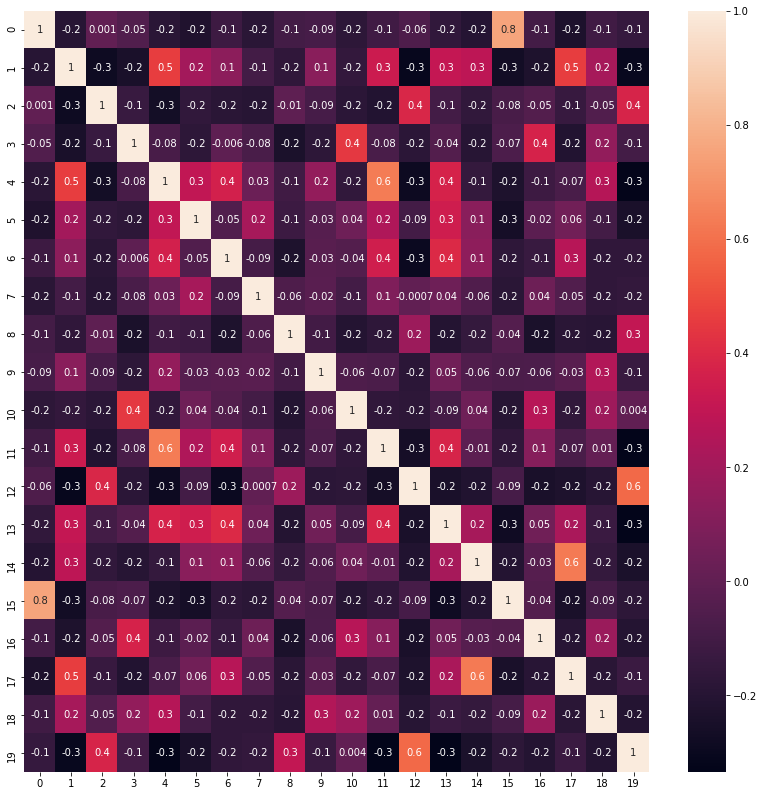

In [ ]:
# 샘플로 논문 20개만 가지고 상관분석 시각화, 전체를 다할 경우 상당한 시간 소요
# 이부분에 대해서는 고민이 필요함, 다른 방식으로 시각화가 필요할 것으로 판단됨(지금은 아무런 의미가 없음)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = test.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [ ]:
def find_sim_text(df, sorted_ind, title_name, top_n=10):
    
    # 인자로 입력된 df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_text = df[df['Article Title'] == title_name]
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 text_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_text.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]

In [ ]:
# 맨첫번째 논문의 제목 확인

df['Article Title'][0]

'Short and Long-Term Field Performances and Optimal Timing of Chip Seal in Hot and Humid Climates'

In [ ]:
# 맨첫번째 논문과 가장 유사한 논문 10개를 similar_text 변수에 할당, 제목과 초록 출력

similar_text= find_sim_text(df, feature_sim_sorted_ind, 'Short and Long-Term Field Performances and Optimal Timing of Chip Seal in Hot and Humid Climates',10)
similar_text[['Article Title','Abstract']]

[[    0  9348  7350   896  9266   913   523  5675  3638 11450]]


,Article Title,Abstract
0,Short and Long-Term Field Performances and Opt...,Chip seal is a preventive maintenance techniqu...
9587,Field Performance of Chip Seals for Pavement P...,"Over time, new pavements deteriorate due to th..."
7555,Effectiveness of Warranted Asphalt Pavements i...,"Since 1996, warranted asphalt pavements have b..."
901,Field Performance of Foaming Warm Mix Asphalt ...,Water-containing and water-based foaming warm ...
9505,Determining the Age and Smoothness of Asphalt ...,Initial performance period is an important inp...
918,Evaluation of Moisture Damage under Crack-Seal...,Crack sealing prevents the ingress of water in...
528,Minimum pavement temperature modeling and mapp...,"According to the Superpave design system, the ..."
5805,Combined Effect of Three-Dimensional Contact L...,Top-down cracking is well recognized as a majo...
3696,Evaluation of Factors Affecting Long-Term Perf...,"In New York State, cold in-place recycling (CI..."
11693,Performance of flexible pavement rehabilitatio...,The results of a study conducted to assess the...


In [ ]:
# 논문의 초록과 제목을 통한 군집분석 실시, 상당한 시간 소요
# 5개 집합으로 군집화 수행(실루엣 계수나, 엘보 계수를 통한 군집의 개수 검증 필요)

from sklearn.cluster import KMeans
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [ ]:
#데이터 프레임의 클러스터 라벨을 추가

df['cluster_label'] = cluster_label
df.head()

,Article Title,Abstract,Publication Year,text,cluster_label
0,Short and Long-Term Field Performances and Opt...,Chip seal is a preventive maintenance techniqu...,2020.0,short and long-term field performances and opt...,4
1,Learning and Adaptation in Dynamic Transit Ass...,The distribution of passenger demand over the ...,2020.0,learning and adaptation in dynamic transit ass...,3
2,Benefit-Cost Analyses of Rectangular Flashing ...,"In recent years, rectangular flashing beacons ...",2020.0,benefit-cost analyses of rectangular flashing ...,2
3,Corrosion Management of Maritime Infrastructure,Maritime infrastructure is at high risk for co...,2019.0,corrosion management of maritime infrastructur...,0
4,From Traditional to Automated Mobility on Dema...,Mobility on demand (MoD) systems have recently...,2019.0,from traditional to automated mobility on dema...,0


In [ ]:
# 군집별 개수 파악

df['cluster_label'].value_counts()

0    7439
4    2884
3    2714
2    1511
1     615
Name: cluster_label, dtype: int64

In [ ]:
# 가장 많은 0번 군집의 데이터 확인

df[df['cluster_label']==0].sort_values(by='Article Title')

,Article Title,Abstract,Publication Year,text,cluster_label
9610,3-D Data Processing to Extract Vehicle Traject...,High-resolution vehicle data including locatio...,2018.0,3-d data processing to extract vehicle traject...,0
9624,A Capacity Estimation Model for a Contraflow L...,Alternative intersection designs are increasin...,2018.0,a capacity estimation model for a contraflow l...,0
2159,A Case for Increasing Efficiency of Road Devel...,The millennium development goals (MDGs) of the...,2009.0,a case for increasing efficiency of road devel...,0
13922,A Cell Transmission Model with Lane Changing a...,This paper presents a cell transmission model ...,2009.0,a cell transmission model with lane changing a...,0
7777,A Chilean Maritime Highway Is It a Possible Do...,Coastal shipping in Chile has a long tradition...,2017.0,a chilean maritime highway is it a possible do...,0
...,...,...,...,...,...
32,Yellow Brick Roadmap to Demand-Based Parking P...,"Washington, D.C. (the District) has been a nat...",2019.0,yellow brick roadmap to demand-based parking p...,0
8733,Yosemite Regional Transportation Strategy - Cr...,In 1992 the Yosemite Area Regional Transportat...,2000.0,yosemite regional transportation strategy - cr...,0
326,YouTube as a Source of Information in Understa...,The automotive industry is currently experienc...,2019.0,youtube as a source of information in understa...,0
14777,"Zion National Park, Utah Enhancing Visitor Exp...","In 2000, Zion National Park in Utah introduced...",2015.0,"zion national park, utah enhancing visitor exp...",0


In [ ]:
# 가장 적은 군집 확인

df[df['cluster_label']==4].sort_values(by='Article Title')

,Article Title,Abstract,Publication Year,text,cluster_label
9890,92-MPa air-entrained high-performance concrete...,An air-entrained high-performance concrete (HP...,2000.0,92-mpa air-entrained high-performance concrete...,4
12226,A 9-year evaluation of field cracking and rutt...,Though the first of 26 Specific Pavement Study...,2004.0,a 9-year evaluation of field cracking and rutt...,4
924,A Balanced Mix Design Method for Selecting the...,The objective of this paper is to present a pr...,2019.0,a balanced mix design method for selecting the...,4
9319,A Cost-Effective and Objective Full-Depth Patc...,Full-depth patching is one of the commonly use...,2018.0,a cost-effective and objective full-depth patc...,4
8408,A Load-Testing Program on Large-Diameter (66-I...,This paper presents the results from a pile lo...,2018.0,a load-testing program on large-diameter (66-i...,4
...,...,...,...,...,...
13166,Windows-based top-down cracking design tool fo...,Top-down cracking has been found to be a predo...,2007.0,windows-based top-down cracking design tool fo...,4
8097,Wisconsin Department of Transportation Hot-Mix...,The Wisconsin Department of Transportation (DO...,2017.0,wisconsin department of transportation hot-mix...,4
3399,Wisconsin Method for Probing Portland Cement C...,Since 1998 the Wisconsin Department of Transpo...,2011.0,wisconsin method for probing portland cement c...,4
12053,Workability of hot-mix asphalt,The term workability has been used to describe...,2004.0,workability of hot-mix asphalt the term workab...,4


In [ ]:
feature_vect.shape

(15163, 333)

In [ ]:
#클러스터별 중심점 추출
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (5, 333)
[[0.00724819 0.00746631 0.00975818 ... 0.00932738 0.01793199 0.01314054]
 [0.00379731 0.00417573 0.00404764 ... 0.00401458 0.00982378 0.01562522]
 [0.00667133 0.00674547 0.00848063 ... 0.00667453 0.01481376 0.01706968]
 [0.00415571 0.00756059 0.0063977  ... 0.00857325 0.01617888 0.011577  ]
 [0.01001637 0.00511487 0.00695598 ... 0.00418544 0.00730766 0.01534651]]


In [ ]:
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [ ]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('주요 키워드:', cluster_detail['top_features'])
        print('논문 제목 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [ ]:
df

,Article Title,Abstract,Publication Year,text,cluster_label
0,Short and Long-Term Field Performances and Opt...,Chip seal is a preventive maintenance techniqu...,2020.0,short and long-term field performances and opt...,4
1,Learning and Adaptation in Dynamic Transit Ass...,The distribution of passenger demand over the ...,2020.0,learning and adaptation in dynamic transit ass...,3
2,Benefit-Cost Analyses of Rectangular Flashing ...,"In recent years, rectangular flashing beacons ...",2020.0,benefit-cost analyses of rectangular flashing ...,2
3,Corrosion Management of Maritime Infrastructure,Maritime infrastructure is at high risk for co...,2019.0,corrosion management of maritime infrastructur...,0
4,From Traditional to Automated Mobility on Dema...,Mobility on demand (MoD) systems have recently...,2019.0,from traditional to automated mobility on dema...,0
...,...,...,...,...,...
15725,Relationship of Lane Width to Capacity for Urb...,To increase the capacity of urban expressways ...,2015.0,relationship of lane width to capacity for urb...,0
15726,Impact of Water Level Rise on the Behaviors of...,"Extreme weather events, such as floods and hea...",2015.0,impact of water level rise on the behaviors of...,0
15727,Methodology to Compute Travel Time of a Rounda...,Urban and suburban arterials with roundabouts ...,2015.0,methodology to compute travel time of a rounda...,3
15728,Use of Matrix-Based Tactile Surface Sensors to...,The pressure distribution at the ballast tie i...,2015.0,use of matrix-based tactile surface sensors to...,4


In [ ]:
drop=['text']
df=df.drop(drop, axis=1)

KeyError: ignored

In [ ]:
df.head()

,Article Title,Abstract,Publication Year,cluster_label
0,Short and Long-Term Field Performances and Opt...,Chip seal is a preventive maintenance techniqu...,2020.0,4
1,Learning and Adaptation in Dynamic Transit Ass...,The distribution of passenger demand over the ...,2020.0,3
2,Benefit-Cost Analyses of Rectangular Flashing ...,"In recent years, rectangular flashing beacons ...",2020.0,2
3,Corrosion Management of Maritime Infrastructure,Maritime infrastructure is at high risk for co...,2019.0,0
4,From Traditional to Automated Mobility on Dema...,Mobility on demand (MoD) systems have recently...,2019.0,0


In [ ]:
df.columns = ['filename', 'opinion_text','Publication Year','cluster_label']
df.head()

,filename,opinion_text,Publication Year,cluster_label
0,Short and Long-Term Field Performances and Opt...,Chip seal is a preventive maintenance techniqu...,2020.0,4
1,Learning and Adaptation in Dynamic Transit Ass...,The distribution of passenger demand over the ...,2020.0,3
2,Benefit-Cost Analyses of Rectangular Flashing ...,"In recent years, rectangular flashing beacons ...",2020.0,2
3,Corrosion Management of Maritime Infrastructure,Maritime infrastructure is at high risk for co...,2019.0,0
4,From Traditional to Automated Mobility on Dema...,Mobility on demand (MoD) systems have recently...,2019.0,0


In [ ]:
# 군집분석 결과
# 0번 : 교통계획, 1번 : 토목공학, 2번 : 교통안전, 3번 : 대중교통, 4번:도로공학)
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=df,\
                                  feature_names=feature_names, clusters_num=5, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
주요 키워드: ['model', 'traffic', 'vehicle', 'data', 'transportation', 'road', 'wa', 'network', 'study', 'method']
논문 제목 : ['Corrosion Management of Maritime Infrastructure', 'From Traditional to Automated Mobility on Demand: A Comprehensive Framework for Modeling On-Demand Services in SimMobility', 'Built Environment Factors Affecting Bike Sharing Ridership: Data-Driven Approach for Multiple Cities', 'Capacity of Urban Arterial Weaving Sections under Lane Signal Control Strategy', 'Local Influences on Zonal Rents in Alberta: Implications for Integrated Modeling', 'User Preferences for Bicycle Infrastructure in Communities with Emerging Cycling Cultures', 'Transportation Asset Valuation: Pre-, Peri- and Post-Fourth Industrial Revolution']
####### Cluster 1
주요 키워드: ['bridge', 'concrete', 'design', 'load', 'wa', 'construction', 'structure', 'element', 'method', 'test']
논문 제목 : ['Reliability Importance as a Measure of Bridge Element Condition Index for Deteriorating Bridges',

In [ ]:
# n_clusters 에 적절한 값을 넣어줍니다.
# fit.predict 를 하고 결과를 cluster 라는 새로운 컬럼에 담습니다.
n_clusters = 5
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vect)
prediction = cls.predict(feature_vect)
df["cluster"] = prediction

In [ ]:
cc = cls.cluster_centers_

In [ ]:
# 2차원으로 감소하여 시각화하기

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(feature_vect)
X_tsne.shape

(15163, 2)

In [ ]:
df2d = pd.DataFrame(X_tsne, columns=['x', 'y'])
df2d.shape

(15163, 2)

In [ ]:
df2d["cluster"] = prediction
df2d.head()

,x,y,cluster
0,32.620243,-25.044405,4
1,-60.959171,-9.651564,0
2,39.356087,30.135921,1
3,-6.919213,-25.219217,0
4,-21.845491,19.562778,0


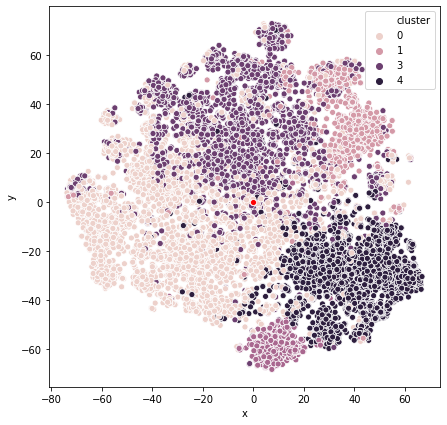

In [ ]:
import seaborn as sns
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df2d, x="x", y="y", hue="cluster")
sns.scatterplot(cc[:, 0], cc[:, 1],  color='red')